<a href="https://colab.research.google.com/github/gustaavoq94/proyecto2/blob/main/proyecto2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib
# Make plots appear in notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib as mpl

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [16]:
filename = '/content/day.csv'
df = pd.read_csv(filename)
df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#**Fuente de datos**
https://www.kaggle.com/datasets/ayessa/bike-sharing-dataset-regression

#**Breve descripción de datos**
El conjunto de datos "Bike Rent" contiene información sobre el alquiler de bicicletas, incluyendo detalles sobre la fecha y hora del alquiler, el clima, la temperatura y la cantidad de alquileres realizados. Cada fila representa un registro de alquiler, y las columnas incluyen información como el momento en que se registró el alquiler (instant), la fecha y hora (dteday), el período de tiempo (season), el año (yr), el mes (mnth), si el día es un feriado (holiday), el día de la semana (weekday), si es un día laborable o no (workingday), la condición meteorológica (weathersit), la temperatura (temp), la sensación térmica (atemp), la humedad (hum), la velocidad del viento (windspeed) y la cantidad total de alquileres (cnt), que se divide en la cantidad de alquileres de usuarios registrados (registered) y la cantidad de alquileres de usuarios casuales (casual).

#**Cual es el objetivo?**
"cnt" sería una buena opción para usar como objetivo ya que representa la cantidad total de alquileres de bicicletas realizados en un día, y es una variable numérica continua que puede ser utilizada para construir modelos de regresión.

#**¿Este es un problema de clasificación o regresión?**
Regresion

In [ ]:
df.shape

(731, 16)

#**¿Cuántas características hay?**
16
#**¿Cuántas filas de datos hay?**
731

#**¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?**
El conjunto de datos "Bike Rent" es relativamente limpio y bien estructurado, lo que hace que la tarea de limpieza y exploración sea relativamente sencilla. Sin embargo, aún existen algunos retos que podrían presentarse durante estas etapas

*Valores faltantes*: aunque el conjunto de datos no parece tener muchos valores faltantes, es posible que algunas columnas tengan valores faltantes que deban ser tratados. Dependiendo del número de valores faltantes y de la columna afectada, es posible que se deba tomar una decisión sobre cómo manejar estos valores faltantes (eliminar las filas con valores faltantes, imputar valores, etc.).

*Datos atípicos*: es posible que el conjunto de datos tenga valores atípicos o extremos que deban ser identificados y tratados. Estos valores pueden tener un impacto significativo en los resultados del modelo, por lo que es importante prestar atención a ellos durante la exploración y limpieza de los datos.

*Correlación entre variables*: algunas de las variables del conjunto de datos pueden estar altamente correlacionadas, lo que puede tener un impacto en el rendimiento del modelo. Por ejemplo, la variable "temp" y la variable "atemp" pueden estar altamente correlacionadas ya que ambas miden la temperatura, pero de diferentes maneras. Es importante identificar estas correlaciones y tomar medidas para manejarlas, si es necesario.

*Selección de características*: cuando se construye un modelo de machine learning, es importante seleccionar las características adecuadas para el modelo. En el caso del conjunto de datos "Bike Rent", es posible que algunas características no sean relevantes para el modelo y deban ser eliminadas. Por ejemplo, la columna "instant" no parece ser relevante para el modelo ya que simplemente identifica el registro de alquiler y no tiene ninguna relación con la cantidad de alquileres de bicicletas.

In [5]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.duplicated().sum()

0

<Axes: >

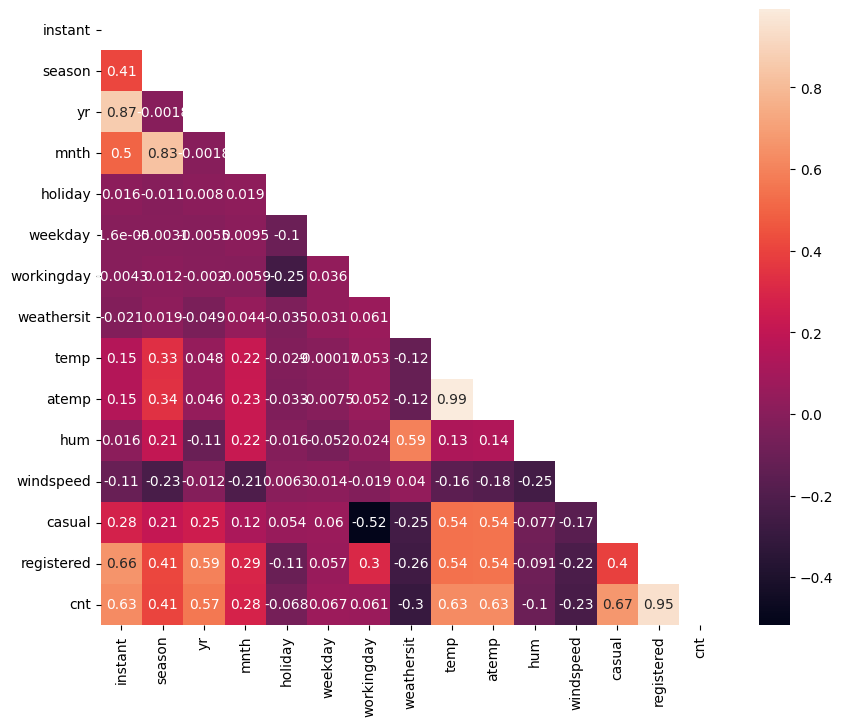

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr('pearson'),annot = True,mask=mask)

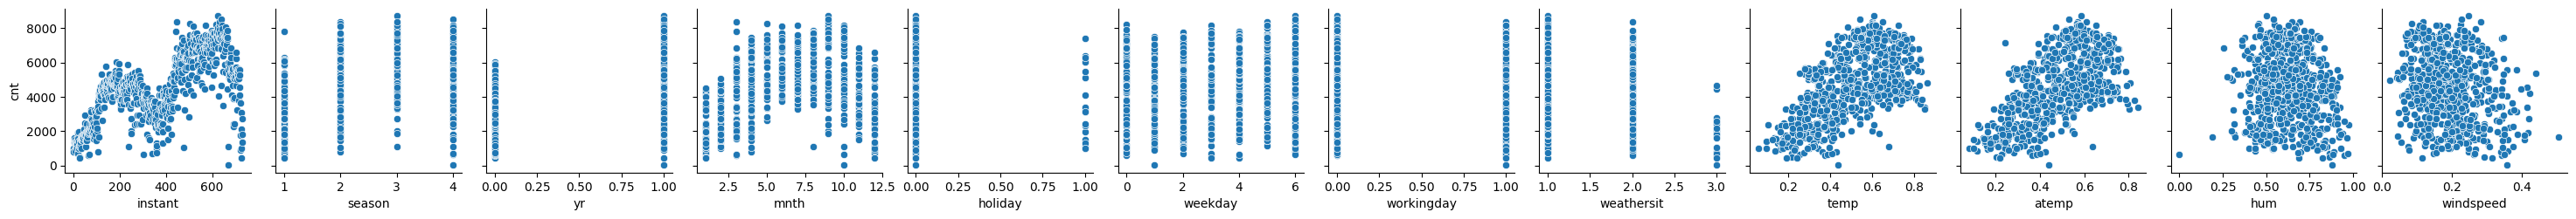

In [11]:
sns.pairplot(data=df, y_vars=['cnt'], x_vars=['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])